In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import string
from matplotlib import pyplot as plt


In [2]:
asciis = list(filter(lambda a: a.isprintable(), string.printable))
asciis = "".join(asciis)

asciis

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [3]:
fnt = ImageFont.truetype("fonts/CascadiaMono.ttf", 12)
bbox = fnt.getbbox(asciis)
width, height = bbox[2], bbox[3]
letter_width = width / len(asciis)

print(bbox)
print(width, height)
print(letter_width)
print(height / letter_width)

(0, 1, 665, 15)
665 15
7.0
2.142857142857143


In [4]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))
img

In [5]:
for i in range(0, len(asciis)):
    img_d.line([(i * letter_width, 0), (i * letter_width, height)], fill=255, width=1)

img

In [6]:
img_d.line([(0, height//2), (width, height//2)], fill=255, width=1)

img

In [7]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))

img

(73, 1)
0.7684210526315789


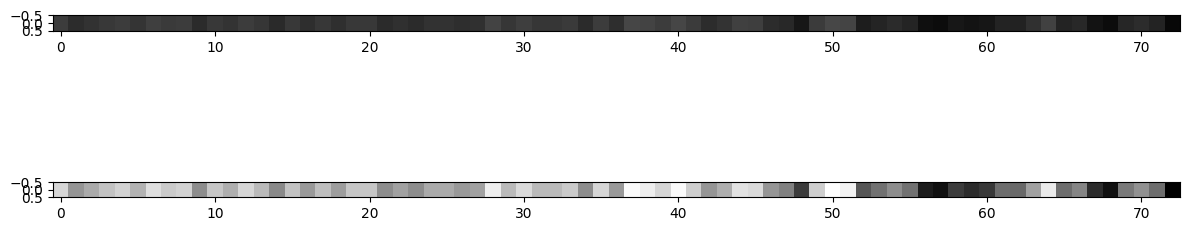

In [8]:
scale = 1/9
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(221, 5)
2.3263157894736843


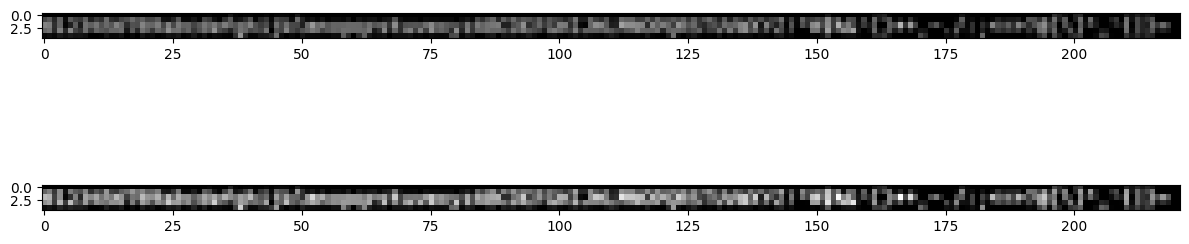

In [9]:
scale = 1/3
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(147, 6)
1.5473684210526315


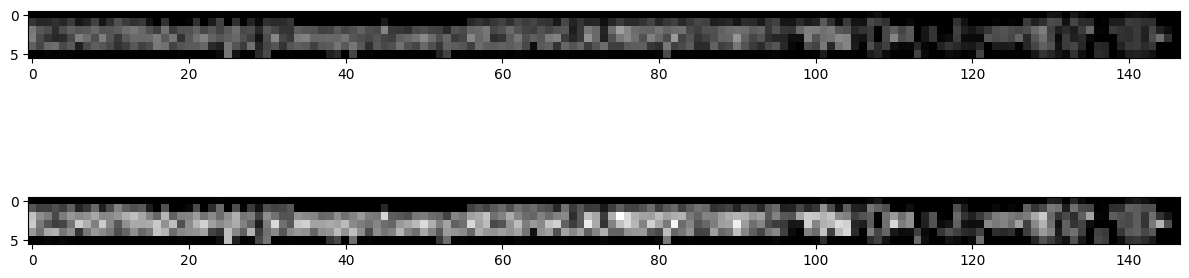

In [10]:
w_scale = 2/9
h_scale = 8/19
resized_box = (int(img.width * w_scale), int(img.height * h_scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

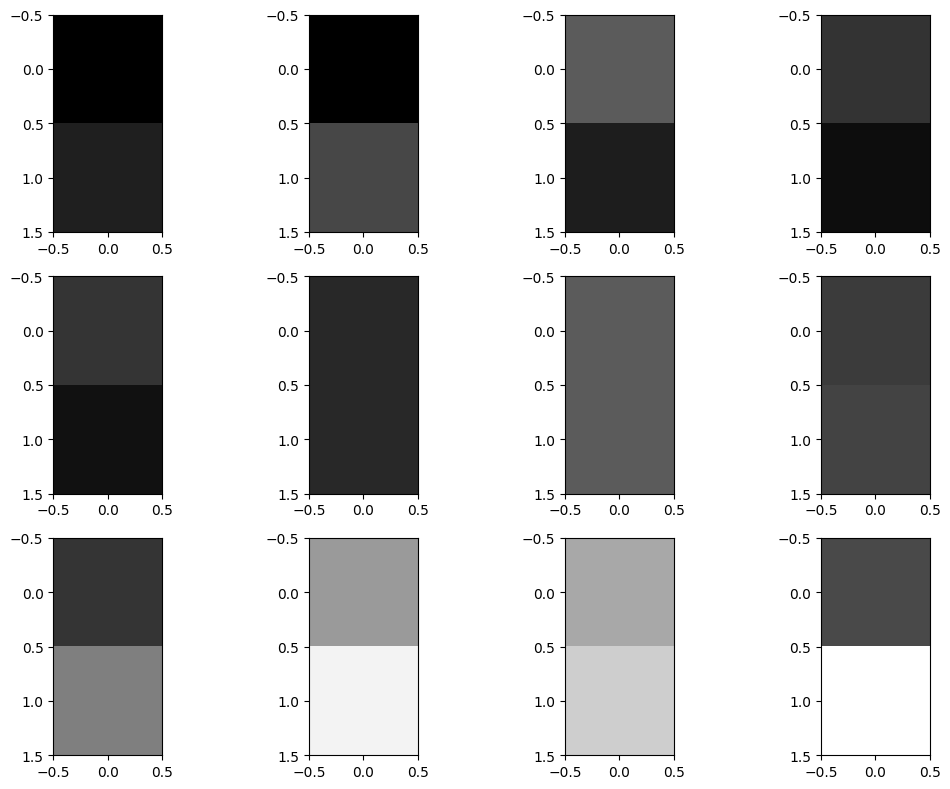

In [11]:
from generate_ascii_palette import generate_brightness_map

char_set = "._^`'-+!L@$g"
brightness_map = generate_brightness_map(char_set, fnt, (1,2), normalize=True, brightness_mod=1.2)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)


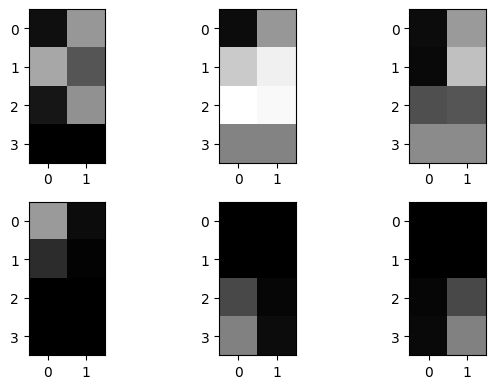

In [12]:
char_set = "⠪⣾⣘⠁⡀⢀"
brightness_map = generate_brightness_map(char_set, fnt, (2,4), normalize=True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)


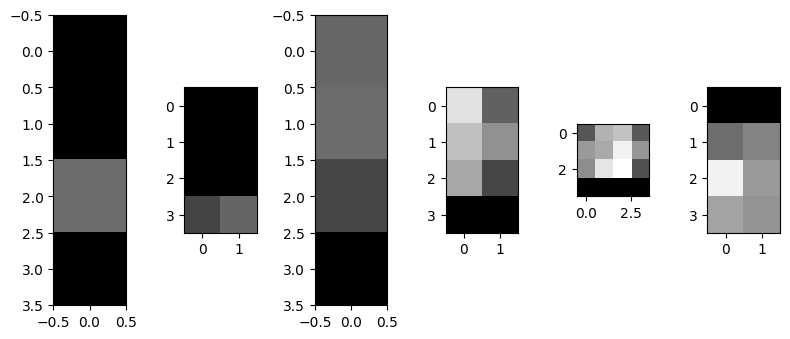

In [13]:
from generate_ascii_palette import generate_non_mono_brightness_map
fnt = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 12)
char_set = "._/$@g"
brightness_map = generate_non_mono_brightness_map(char_set, fnt, 4, 4, normalize=True)
fig, axs = plt.subplots(ncols=6, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i%axs.shape[0]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)

14
dict_keys(['@', '.g', 'g.', '.$', '$.', '/_', '_/', '._', '_.', '//', '../', './.', '/..', '...'])


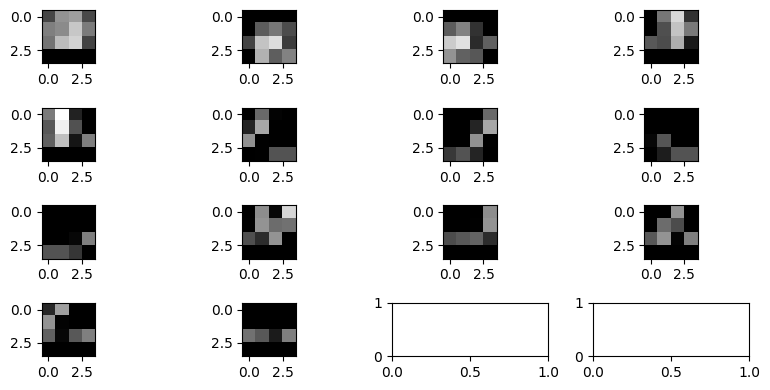

In [14]:
from generate_ascii_palette import generate_non_mono_multi_char_brightness_map

fnt = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 12)
char_set = "._/$@g"
brightness_map = generate_non_mono_multi_char_brightness_map(char_set, fnt, 4, 4, normalize=True)
print(len(brightness_map))
print(brightness_map.keys())
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)

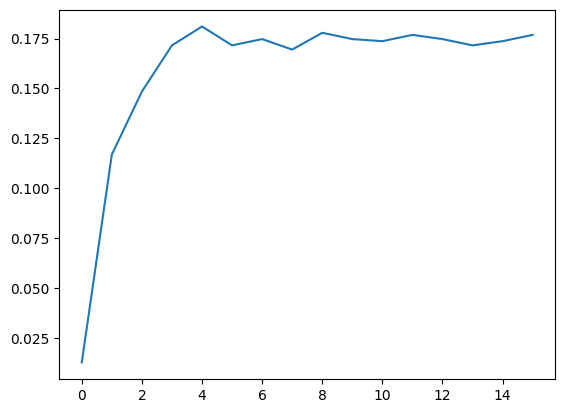

final no noise 0.8947368421052632
final 0.19052631578947368


In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.base import clone
from copy import deepcopy
import numpy as np
from IPython.display import clear_output
brightness_map = generate_brightness_map(asciis, fnt, (2,4), normalize=True)
classes = list(brightness_map.keys())
brightness_X = np.array([b.flatten() for b in brightness_map.values()])
brightness_y = list(brightness_map.keys())

repetitions = 50
train_X = np.tile(brightness_X, (repetitions,1))
train_y = list(brightness_map.keys()) * repetitions

noise = 0.6
test_X = deepcopy(train_X)
test_y = deepcopy(train_y)
test_X += ((np.random.random(test_X.shape)-0.5) * noise)
test_X = np.clip(test_X, a_min=0, a_max=1)

val_X = test_X[:len(test_X) // 5]
val_y = test_y[:len(test_y) // 5]
test_X = test_X[len(test_X) // 5:]
test_y = test_y[len(test_y) // 5:]

cls = MLPClassifier(hidden_layer_sizes=(50,))
scores = []
for i in range(151):
    new_train_X = deepcopy(train_X)
    new_train_y = deepcopy(train_y)
    
    new_train_X += ((np.random.random(new_train_X.shape)-0.5) * noise)
    new_train_X = np.clip(new_train_X, a_min=0, a_max=1)
    new_train_X, new_train_y = shuffle(new_train_X, new_train_y)
    cls.partial_fit(new_train_X, new_train_y, classes)
    if i % 10 == 0:
        scores.append(cls.score(val_X, val_y))
        clear_output()
        plt.plot(scores)
        plt.show()
    

print('final no noise', cls.score(brightness_X, brightness_y))
print('final', cls.score(test_X, test_y))



In [104]:
from ascii_art_conversion_mlp import train_classifier

brightness_shape = (2,4)
noise = 0.2
cls, char_to_brightness_map = train_classifier(asciis, fnt, brightness_shape, (20), 100, noise)

brightness_X = np.array([b.flatten() for b in brightness_map.values()])
brightness_y = list(brightness_map.keys())

repetitions = 50
train_X = np.tile(brightness_X, (repetitions,1))
train_y = list(brightness_map.keys()) * repetitions

test_X = deepcopy(train_X)
test_y = deepcopy(train_y)
test_X += ((np.random.random(test_X.shape)-0.5) * noise)
test_X = np.clip(test_X, a_min=0, a_max=1)

print('final no noise', cls.score(brightness_X, brightness_y))
print('final', cls.score(test_X, test_y))

final no noise 0.9578947368421052
final 0.6823157894736842


In [103]:
cls.predict([brightness_map['$'].flatten()])

array(['$'], dtype='<U1')

In [79]:

from img_processing import *
from ascii_art_conversion_mxn import *

def quantize_grayscale_mxn(img: Image.Image, char_to_brightness_map,
                           brightness_hw_shape, dither=DITHER_MODES.NONE, allow_err=0.0, cls=None) -> list[list[int, int]]:
    img_arr = np.array(img) / 255

    if (dither == DITHER_MODES.JJN):
        scaled_jjn_k, jjn_k_offset = scale_kernel(jjn_k, brightness_hw_shape[1], brightness_hw_shape[0], 2)
    if (dither == DITHER_MODES.FS):
        scaled_fs_k, fs_k_offset = scale_kernel(fs_k, brightness_hw_shape[1], brightness_hw_shape[0], 1)

    char_arr = []
    for up_y in range(brightness_hw_shape[0], img_arr.shape[0], brightness_hw_shape[0]):
        char_arr.append([])
        for up_x in range(brightness_hw_shape[1], img_arr.shape[1], brightness_hw_shape[1]):
            x = up_x - brightness_hw_shape[1]
            y = up_y - brightness_hw_shape[0]
            win = np.copy(img_arr[y:up_y, x:up_x])
            #min_char, min_br = find_match(win, char_to_brightness_map, dither, allow_err)
            min_char = cls.predict([win.flatten()])[0]
            min_br = char_to_brightness_map[min_char]

            if (dither == DITHER_MODES.JJN):
                apply_error_diff_window(min_br, min_br.shape[1], min_br.shape[0], img_arr, x, y, scaled_jjn_k, jjn_k_offset)
            
            if (dither == DITHER_MODES.FS):
                apply_error_diff_window(min_br, min_br.shape[1], min_br.shape[0], img_arr, x, y, scaled_fs_k, fs_k_offset)
                        
            char_arr[-1].append(min_char)
            
    return char_arr

In [102]:
IMG_PATH = "imgs/storm-640-480.jpg"
orig_img = Image.open(IMG_PATH).convert("L")
proc_img = preprocess_img(orig_img, 0.5)
ascii_arr = quantize_grayscale_mxn(proc_img, char_to_brightness_map, (brightness_shape[1], brightness_shape[0]), DITHER_MODES.FS, 0.0, cls=cls)
for i in range(len(ascii_arr)):
    for j in range(len(ascii_arr[i])):
        print(ascii_arr[i][j], sep='', end='')
    print('\n', end='')

`````````````````````````C`C.C`C.CCCCCCCCCCC;C`C `C``CC]Q@CC;CCCCCCOCDCCQDCCCCCC ```;C ``;CC ``````````;CCCCCCCCCCCC`CCCQQQQQQQQQQQQQQQQCCCCCCCCCCCCCCCCCCCCCCC
C`C`C`C`C`C`C`C`C`C`C;C``C`C`C`CCC```C`CC`C`C`C C `C  gQQQC `CCCCCCCCCCCCCCCCCCDgC;CCCCC_CCCC`C`C`C`C;CCCC`CCCCC`  `;|QCQQQQQQQQQQQQQQQQQCCCCCCC;CCCCCCCCCCCCCC
``````````;C C`C C C`C`C```C`C```CCC`C`C`C`C`C ``C C~.ZQQQgC|````CCCCCCCCCCCCCCCCQ@CCCCCCCCCCCCC,;``|CCCC `CCC``C`C|CQQQQQQQQQQQQQQQQQQQQQCCCCCCCCCCCCCCCCCCCCC
`C`C.CCCCC`C`C`C`C`C`C`CCC````C``` `C C`C`C ``C`C`C CCQQ@CDQgCC|C  ```CQCCCCCCCCCCQCCCCCC``CCCCCCC;CCCCCCC ```C ``CCQCQQQQQQQQQQQQQQQQQQQQQQQQDCCCCCCCCCCC'` `C
C`C`C ```C`C`C`C`C`C`C`C CCCC`C`C.C `C ````C.C`C`C`C CQQ@CCCDQgC g_g_gQ|C``CCCCCCCQQCC ``C`CCCCCCCCCCCCCC`C`C `C;|CCQQQQQQQQQQQQQQQQQQQQQQQQQDQCCCCCCCCCCC C```
`C`C`CCC`C`C`C`C`C`C`C`C````C`C`C`CC`C`CCC`C`C`C`C`C`gQQ@C.CCCDQDDTCCCC`"TCCCCCCCCCQQQgCC |;CCCCCCCCCCCCOCCC|gggQCQQCQQQQQQQQQQQQQQQQQQQQQQQDDCCCCCCCCCCCC `C;C
``;C`` ``C`C`C`C`C`C`C`CCCC`C`C`C`C`C`C 